In [1]:
# 기본
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 데이터 가져오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [4]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer.data.shape

(569, 30)

In [6]:
cancer.target.shape

(569,)

In [7]:
cancer.data[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

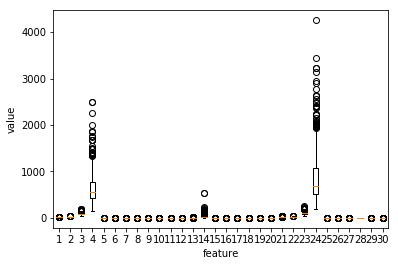

In [8]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [9]:
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [11]:
# 0은 음성, 1은 양성
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [12]:
x = cancer.data
y = cancer.target

```python
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y,test_size=0.2, random_state=42)
```

In [13]:
from sklearn.model_selection import train_test_split
# stratify=y : y값의 비율과 동일하게 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [14]:
x_train.shape

(455, 30)

In [15]:
x_test.shape

(114, 30)

In [16]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285], dtype=int64))

In [17]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([42, 72], dtype=int64))

In [21]:
class LogisticNeuron:
    def __init__(self):
        self.w = None
        self.b = None
        
    # 정방향 계산 - 선형함수(직선방정식을 이용해서 계산)
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    # 역방향계산 - 경사하강법
    def backprob(self, x, err):
        w_gred = x * err
        b_gred = 1 * err
        return w_gred, b_gred
    
    # 훈련을 시키는 메서드
    def fit(self, x, y, epochs=100):
        # 가중치를 모든 샘플에 1로 초기화
        self.w = np.ones(x.shape[1])
        # 절편
        self.b = 0
        
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                # 정방향 계산
                z = self.forpass(x_i)
                # 활성화 함수 적용
                a = self.activation(z)
                # 오차계산
                err = -(y_i - a)
                # 역방향 계산
                w_gred, b_gred = self.backprob(x_i, err)
                self.w -= w_gred
                self.b -= b_gred
    
    # 활성화 함수 z = -무한대 ~ +무한대
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))  # 시그모이드
        return a
    
    # 예측하는 메서드
    def predict(self, x):
        # 선형 함수 적용, 리스트 내포 문법
        z = [self.forpass(x_i) for x_i in x]
        # 활성화 함수 적용
        a = self.activation(np.array(z))
        # 계단 함수 적용
        return a > 0.5

In [22]:
# 로지스틱 회귀 모델 훈련시키는 작업
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

In [23]:
np.mean(neuron.predict(x_test) == y_test)

0.8245614035087719

### 손실함수의 결과 값 조정해서 저장하는 기능 추가
- \_\_init__ 메서드에 손실 함수 결과 값을 저장할 리스트 self.losses 생성
- 샘플마다 손실함수를 계산하고 그 결과값을 모두 더한 다음 샘플 개수로 나눈 평균값을 self.losses에 저장
- a가 0에 가까워 지면 np.log()함수의 값은 음의 무한대가 되고 a가 1에 가까워 지면 np.log() 함수의 값은 0이 되기 때문
- 손실 값이 무한해지면 정확한 계산 불가능
- a의 값이 1e-10 ~ 1-1\*1e-10 사이가 되도록 np.clip()함수로 조정해야함
- np.clip()함수는 주어진 범위 밖의 값을 범위 양 끝 값으로 잘라낸다.

[참고](https://asthtls.tistory.com/1014)

In [27]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []  #손실 값을 저장하는 객체
        
    # 정방향 계산 - 선형함수(직선방정식을 이용해서 계산)
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    # 역방향계산 - 경사하강법
    def backprob(self, x, err):
        w_gred = x * err
        b_gred = 1 * err
        return w_gred, b_gred
    
    # 훈련을 시키는 메서드
    def fit(self, x, y, epochs=100):        
        # 가중치를 모든 샘플에 1로 초기화
        self.w = np.ones(x.shape[1])
        # 절편
        self.b = 0
        
        for i in range(epochs):
            loss = 0
            # 모든 샘플에 대한 반복 작업을 위해 인덱스 섞는 작업
            indexes = np.random.permutation(np.arange(len(x)))
            
            for i in indexes:
                # 정방향 계산
                z = self.forpass(x[i])
                # 활성화 함수 적용
                a = self.activation(z)
                # 오차계산
                err = -(y[i] - a)
                # 역방향 계산
                w_gred, b_gred = self.backprob(x[i], err)
                self.w -= w_gred
                self.b -= b_gred
                
                # 안전한 로그함수의 계산을 위해 클리핑 한 후 손실을 누적
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))
                
            self.losses.append(loss / len(y))
    
    # 활성화 함수 z = -무한대 ~ +무한대
    def activation(self, z):
        a = 1 / (1 + np.exp(-z))  # 시그모이드
        return a
    
    # 예측하는 메서드
    def predict(self, x):
        # 선형 함수 적용, 리스트 내포 문법
        z = [self.forpass(x_i) for x_i in x]
        # 활성화 함수 적용
        a = self.activation(np.array(z))
        # 계단 함수 적용
        return a > 0.5
    
    # 평가함수
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [28]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.9298245614035088

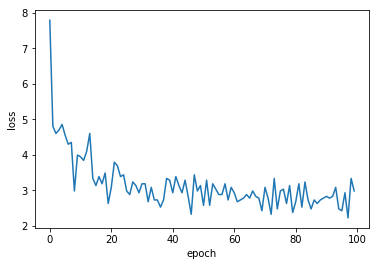

In [29]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [42]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.9385964912280702

In [32]:
sgd.predict(x_test[:10])

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [43]:
sgd = SGDClassifier(loss='hinge', max_iter=100, tol=1e-3, random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8596491228070176